In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
%matplotlib inline

##### Data Generation

In [2]:
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=15)

In [3]:
X

array([[-0.3779567 ,  1.04389498,  1.04349443, ..., -0.0671922 ,
         0.17547148, -1.04964564],
       [-0.32525851,  1.27626282, -0.68612327, ...,  1.00663329,
        -0.83369182,  0.95774417],
       [ 0.73901891, -0.60090284, -0.17729436, ..., -0.21898072,
         0.87864296, -1.25774001],
       ...,
       [ 0.67556288, -0.53841971, -1.29950008, ...,  2.04333597,
         0.94738793,  0.79035376],
       [ 2.62971021, -2.45289885, -1.35978523, ...,  0.37889809,
        -1.97189411, -0.2522504 ],
       [-1.79149103, -0.12190773,  0.53515332, ..., -1.94135733,
         0.58900166, -1.00748218]])

In [4]:
y

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,

##### Model Training

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [8]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [12]:
y_pred=model.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0])

In [11]:
model.predict_proba(X_test)

array([[9.33104089e-01, 6.68959106e-02],
       [6.59976832e-01, 3.40023168e-01],
       [8.65439561e-01, 1.34560439e-01],
       [9.59081747e-02, 9.04091825e-01],
       [2.43108150e-01, 7.56891850e-01],
       [5.76396931e-01, 4.23603069e-01],
       [8.25188888e-01, 1.74811112e-01],
       [2.29999952e-04, 9.99770000e-01],
       [1.25363187e-02, 9.87463681e-01],
       [2.73346597e-03, 9.97266534e-01],
       [7.06227890e-03, 9.92937721e-01],
       [5.68134296e-01, 4.31865704e-01],
       [8.38796778e-02, 9.16120322e-01],
       [9.73835584e-01, 2.61644162e-02],
       [1.27501162e-02, 9.87249884e-01],
       [8.06120072e-01, 1.93879928e-01],
       [9.95125747e-01, 4.87425270e-03],
       [1.78699988e-02, 9.82130001e-01],
       [9.78717701e-01, 2.12822989e-02],
       [3.90303620e-02, 9.60969638e-01],
       [3.39139480e-02, 9.66086052e-01],
       [3.13743686e-02, 9.68625631e-01],
       [5.00274883e-02, 9.49972512e-01],
       [8.18573651e-01, 1.81426349e-01],
       [8.590384

In [18]:
score = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print("score:",score)
print("confusion matrix:")
print(cm)

score: 0.9166666666666666
confusion matrix:
[[146  11]
 [ 14 129]]


In [19]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       157
           1       0.92      0.90      0.91       143

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [21]:
# Precision	Out of all messages predicted as Not Spam (0)or Spam(1), how many were actually Not Spam?	
# 0 --> 91% (91 out of 100 were correct)	
# 1 --> 92% (92 out of 100 were correct) 

# Recall Out of all actual Not Spam (0) or Spam(1) messages, how many did we correctly predict?	
# 93% (93 out of 100 actual Not Spam messages were correctly identified)	
# 90% (90 out of 100 actual Spam messages were correctly identified)

# 157 Not Spam	143 Spam

# Accuracy	How many messages were correctly classified overall?	92% (Out of 300 messages, 276 were correct)
# Macro Avg	The average of precision, recall, and F1-score across both classes (treating both equally).	92%
# Weighted Avg	Similar to macro avg but considers the number of samples in each class.	92%

# fewer false positives (wrongly marking Not Spam as Spam) → Focus on higher precision.
# fewer false negatives (missing spam emails) → Focus on higher recall.

##### Hyperparameter Tuning GridSearchCV

In [67]:
# grid search cv : take combination of all the parameters.take time
model = LogisticRegression(max_iter=5000)
param_grid = [
    {'penalty': ['l1'], 'C': [100, 10, 1.0, 0.1, 0.01], 'solver': ['liblinear', 'saga'], 'max_iter': [5000]},
    {'penalty': ['l2'], 'C': [100, 10, 1.0, 0.1, 0.01], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'max_iter': [5000]},
    {'penalty': ['elasticnet'], 'C': [100, 10, 1.0, 0.1, 0.01], 'solver': ['saga'], 'l1_ratio': [0.5], 'max_iter': [5000]}
]
cv = StratifiedKFold()
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)

Best Parameters: {'C': 0.01, 'l1_ratio': 0.5, 'max_iter': 5000, 'penalty': 'elasticnet', 'solver': 'saga'}
Best Score: 0.927142857142857


In [68]:
y_pred=grid.predict(X_test)

In [70]:
score=accuracy_score(y_pred,y_test)
print(score)
print(confusion_matrix(y_pred,y_test))

0.92
[[149  16]
 [  8 127]]


In [71]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.90      0.93       165
           1       0.89      0.94      0.91       135

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



##### RandomizedSearchCV

In [75]:
# random search cv : will take some random parameters and try to find out at what parameter will be suitable for the problem statement
model = LogisticRegression(max_iter=5000)
param_distributions = [
    {'penalty': ['l1'], 'C': [100, 10, 1.0, 0.1, 0.01], 'solver': ['liblinear', 'saga'], 'max_iter': [5000]},
    {'penalty': ['l2'], 'C': [100, 10, 1.0, 0.1, 0.01], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'max_iter': [5000]},
    {'penalty': ['elasticnet'], 'C': [100, 10, 1.0, 0.1, 0.01], 'solver': ['saga'], 'l1_ratio': [0.5], 'max_iter': [5000]}
]
cv = StratifiedKFold()
random_search = RandomizedSearchCV(estimator=model,
                                   param_distributions=param_distributions,
                                   n_iter=20,  # Number of parameter settings to try
                                   scoring='accuracy',
                                   cv=cv,
                                   n_jobs=-1,
                                   random_state=42,  # For reproducibility
                                   error_score='raise'
                                   )
random_search.fit(X_train, y_train)
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Best Parameters: {'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 5000, 'l1_ratio': 0.5, 'C': 0.01}
Best Score: 0.927142857142857


In [77]:
y_pred=random_search.predict(X_test)

In [78]:
score=accuracy_score(y_pred,y_test)
print(score)
print(confusion_matrix(y_pred,y_test))

0.92
[[149  16]
 [  8 127]]


In [79]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.90      0.93       165
           1       0.89      0.94      0.91       135

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



##### Multiclass Classification

In [80]:
X, y = make_classification(n_samples=1000, n_features=10,n_informative=3, n_classes=3, random_state=15)

In [81]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [82]:
model=LogisticRegression(multi_class='ovr')
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
score = accuracy_score(y_test,y_pred)
print(score)
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

0.79
[[84  3 10]
 [10 74  7]
 [ 8 25 79]]
              precision    recall  f1-score   support

           0       0.82      0.87      0.84        97
           1       0.73      0.81      0.77        91
           2       0.82      0.71      0.76       112

    accuracy                           0.79       300
   macro avg       0.79      0.79      0.79       300
weighted avg       0.79      0.79      0.79       300



##### Imbalanced Dataset

In [83]:
from collections import Counter
from sklearn.datasets import make_classification

In [84]:
X,y=make_classification(n_samples=10000,n_features=2,n_clusters_per_class=1,
                   n_redundant=0,weights=[0.99],random_state=10)

In [85]:
X

array([[ 1.87991016, -1.4850347 ],
       [ 0.37708311, -2.23858488],
       [ 1.35431163, -2.66463822],
       ...,
       [ 0.99509904, -0.54192355],
       [ 1.75859359, -1.54961188],
       [ 0.79770543, -1.99467372]])

In [86]:
Counter(y)

Counter({0: 9846, 1: 154})

In [88]:
y

array([0, 0, 0, ..., 0, 0, 0])

<Axes: xlabel='Feature1', ylabel='Feature2'>

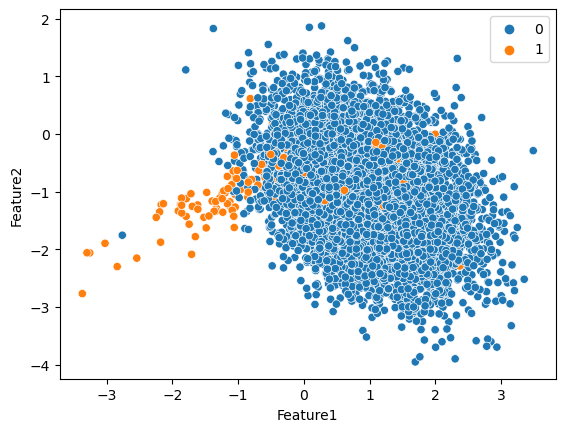

In [96]:
sns.scatterplot(data=pd.DataFrame(X, columns=['Feature1', 'Feature2']), x="Feature1", y="Feature2", hue=y)

In [97]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [100]:
model = LogisticRegression()
penalty = ['l1', 'l2', 'elasticnet', None]
c_values = [100, 10, 1.0, 0.1, 0.01]
solver = ['newton-cg', 'lbfgs', 'liblinear', 'saga']  # Removed 'sag' (no l1 support)
class_weight = [{0: w, 1: y} for w in [1, 10, 50, 100] for y in [1, 10, 50, 100]]
max_iter = [100, 200, 500]
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': c_values,
    'solver': ['liblinear'],
    'class_weight': class_weight,
    'max_iter': max_iter
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=cv,
    n_jobs=-1,  # Use all CPU cores
    verbose=2
)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits
[CV] END C=100, class_weight={0: 1, 1: 1}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=100, class_weight={0: 1, 1: 1}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=100, class_weight={0: 1, 1: 1}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=100, class_weight={0: 1, 1: 1}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=100, class_weight={0: 1, 1: 1}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=100, class_weight={0: 1, 1: 1}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=100, class_weight={0: 1, 1: 1}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=100, class_weight={0: 1, 1: 1}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=100, class_weight={0: 1, 1: 1}, max_iter=100, penalty=l1, solver=liblinear; t

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'max_iter': [100, 200, 500], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring='accuracy', verbose=2)

In [101]:
print("Best parameters:", grid.best_params_)
print("Best accuracy:", grid.best_score_)

Best parameters: {'C': 0.01, 'class_weight': {0: 10, 1: 50}, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best accuracy: 0.9878666666666666


In [102]:
y_pred=grid.predict(X_test)

In [103]:
score=accuracy_score(y_pred,y_test)
print(score)
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

0.9912
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2482
           1       0.43      0.72      0.54        18

    accuracy                           0.99      2500
   macro avg       0.72      0.86      0.77      2500
weighted avg       0.99      0.99      0.99      2500

[[2465   17]
 [   5   13]]


##### ROC Curve and ROC AUC Score

In [104]:
# decide thereshold value

In [105]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [106]:
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [109]:
dummy_model_prob = [0 for _ in range(len(y_test))]

In [110]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [111]:
model_prob = model.predict_proba(X_test)

In [113]:
model_prob[:5]

array([[0.08164368, 0.91835632],
       [0.11341499, 0.88658501],
       [0.97688371, 0.02311629],
       [0.01807382, 0.98192618],
       [0.04544501, 0.95455499]])

In [114]:
# positive outcome
model_prob = model_prob[:,1]

In [115]:
dummy_model_auc=roc_auc_score(y_test,dummy_model_prob)
model_auc=roc_auc_score(y_test,model_prob)
print(dummy_model_auc)
print(model_auc)

0.5
0.907648


In [116]:
dummy_fpr, dummy_tpr, _ = roc_curve(y_test, dummy_model_prob)
model_fpr, model_tpr, thresholds = roc_curve(y_test, model_prob)

In [117]:
thresholds

array([1.99941079e+00, 9.99410789e-01, 9.48821704e-01, 9.45822838e-01,
       9.35475968e-01, 9.33992424e-01, 9.28149306e-01, 9.26128400e-01,
       9.09612674e-01, 9.01641419e-01, 8.98006100e-01, 8.87888976e-01,
       8.55067260e-01, 8.50088690e-01, 8.45815476e-01, 8.32456357e-01,
       8.19802513e-01, 8.15795432e-01, 8.07773360e-01, 8.01684721e-01,
       7.72666184e-01, 7.71984305e-01, 7.18090773e-01, 7.16353949e-01,
       6.61932009e-01, 6.29054005e-01, 6.17692223e-01, 6.09937071e-01,
       5.95782185e-01, 5.88259352e-01, 5.69445881e-01, 5.42763147e-01,
       5.28902010e-01, 5.13580364e-01, 5.10710770e-01, 4.87563605e-01,
       4.84614874e-01, 4.55642609e-01, 4.46920501e-01, 4.25852373e-01,
       3.64309105e-01, 3.56487638e-01, 3.45966312e-01, 3.07821013e-01,
       3.00875411e-01, 2.85434309e-01, 2.84734466e-01, 2.18608803e-01,
       1.96799778e-01, 1.34064894e-01, 1.33282726e-01, 1.30277048e-01,
       1.26943039e-01, 1.04666641e-01, 1.04124073e-01, 7.03330148e-02,
      

In [118]:
model_fpr,model_tpr

(array([0.   , 0.   , 0.   , 0.008, 0.008, 0.016, 0.016, 0.024, 0.024,
        0.032, 0.032, 0.048, 0.048, 0.056, 0.056, 0.072, 0.072, 0.08 ,
        0.08 , 0.088, 0.088, 0.096, 0.096, 0.104, 0.104, 0.112, 0.112,
        0.128, 0.128, 0.136, 0.136, 0.144, 0.144, 0.16 , 0.16 , 0.184,
        0.184, 0.2  , 0.2  , 0.208, 0.208, 0.224, 0.224, 0.24 , 0.24 ,
        0.256, 0.256, 0.296, 0.296, 0.392, 0.392, 0.4  , 0.4  , 0.448,
        0.448, 0.528, 0.528, 0.56 , 0.56 , 0.624, 0.624, 0.952, 0.952,
        1.   ]),
 array([0.   , 0.008, 0.288, 0.288, 0.368, 0.368, 0.376, 0.376, 0.424,
        0.424, 0.44 , 0.44 , 0.528, 0.528, 0.552, 0.552, 0.608, 0.608,
        0.64 , 0.64 , 0.664, 0.664, 0.704, 0.704, 0.752, 0.752, 0.784,
        0.784, 0.792, 0.792, 0.808, 0.808, 0.824, 0.824, 0.832, 0.832,
        0.84 , 0.84 , 0.848, 0.848, 0.904, 0.904, 0.912, 0.912, 0.92 ,
        0.92 , 0.928, 0.928, 0.944, 0.944, 0.952, 0.952, 0.96 , 0.96 ,
        0.968, 0.968, 0.976, 0.976, 0.984, 0.984, 0.992, 0.9

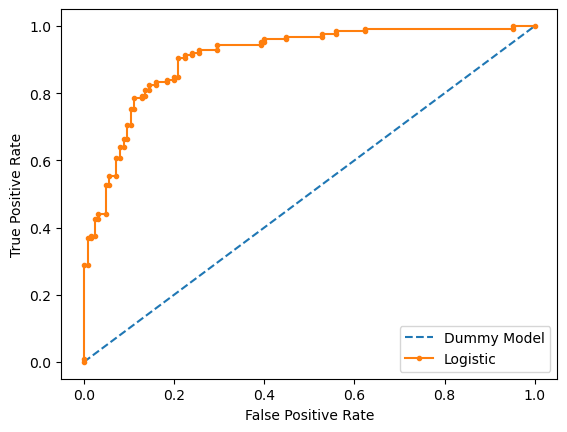

In [120]:
# plot the roc curve for the model
plt.plot(dummy_fpr, dummy_tpr, linestyle='--', label='Dummy Model')
plt.plot(model_fpr, model_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

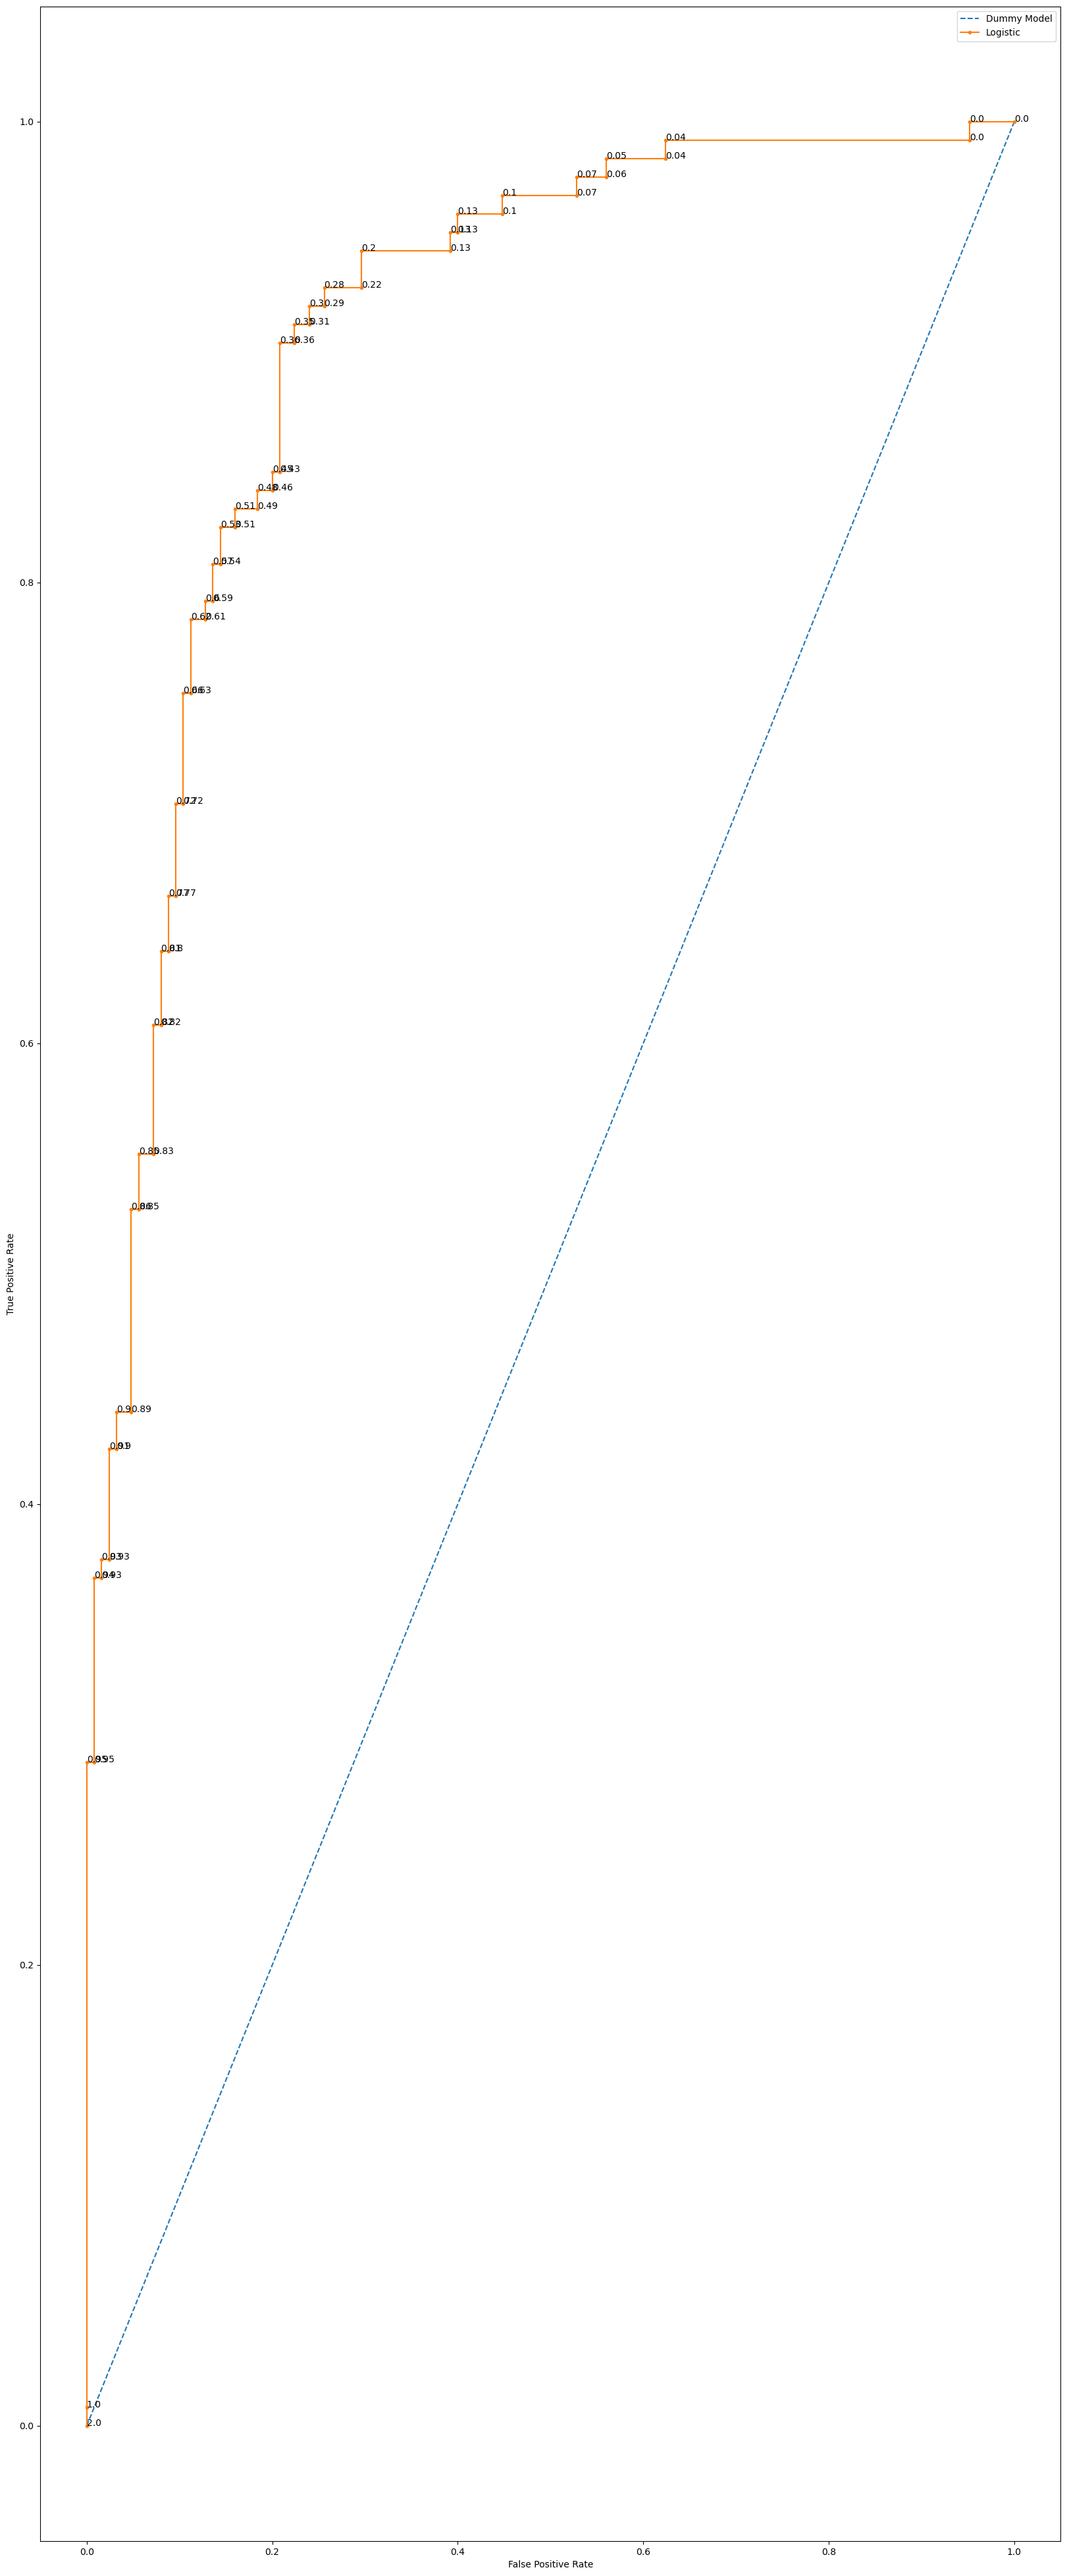

In [127]:
fig = plt.figure(figsize=(20,50))
plt.plot(dummy_fpr, dummy_tpr, linestyle='--', label='Dummy Model')
plt.plot(model_fpr, model_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
for xyz in zip(model_fpr, model_tpr,thresholds):   
    plt.annotate('%s' % np.round(xyz[2],2), xy=(xyz[0],xyz[1]))
# show the legend
plt.legend()
# show the plot
plt.show()